<a href="https://colab.research.google.com/github/hmyrcmn/KUL/blob/main/suscess_sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.utils import shuffle

!git clone https://github.com/hmyrcmn/KUL.git


Cloning into 'KUL'...
remote: Enumerating objects: 104573, done.
remote: Counting objects: 100% (34005/34005), done.
remote: Compressing objects: 100% (4238/4238), done.
remote: Total 104573 (delta 29777), reused 33991 (delta 29763), pack-reused 70568
Receiving objects: 100% (104573/104573), 171.95 MiB | 17.64 MiB/s, done.
Resolving deltas: 100% (100087/100087), done.
Updating files: 100% (36152/36152), done.


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

!git clone https://github.com/hmyrcmn/KUL.git

# Veri yükleme
true_folder ='/content/KUL/BigData/newData/trueVal'
X_data = []

Y_labels = []

for filename in os.listdir(true_folder):
    data = np.genfromtxt(os.path.join(true_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels.append(1)

false_folder = '/content/KUL/BigData/newData/falseVal'
for filename in os.listdir(false_folder):
    data = np.genfromtxt(os.path.join(false_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels.append(0)




X_data = np.array(X_data)
Y_labels = np.array(Y_labels)

# X_data ve Y_labels dizilerini karıştırın
X_data, Y_labels = shuffle(X_data, Y_labels)


print("x_data shape: ",X_data.shape)
print("x_data 5: ",X_data[:1])
print("Y_labels 5: ",Y_labels[:1])

# X_data=X_data,x2_data
X_data


In [12]:
# Verileri düzenleme ve normalleştirme
print("x_data shape: ",X_data.shape)

num_samples = len(X_data)
sequence_length = X_data.shape[1]
num_features = X_data.shape[2]

X_data_normalized = X_data.reshape(num_samples, sequence_length * num_features)#4000,1000 *1

# Eğitim ve test setlerine bölme


X_train, X_test, y_train, y_test = train_test_split(X_data_normalized, Y_labels, test_size=0.2, random_state=42)

print("X_train.shape:",X_train.shape)
print("y_train:",y_train.shape)


x_data shape:  (4000, 1000, 1)
X_train.shape: (3200, 1000)
y_train: (3200,)


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Modeli oluştur
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(1000, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Modeli derle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğit
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Modeli değerlendir
loss, accuracy = model.evaluate(X_train, y_train)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/10
100/100 [==============================] - 11s 100ms/step - loss: 4.0090 - accuracy: 0.8672
Epoch 2/10
100/100 [==============================] - 9s 90ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 8s 77ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 9s 93ms/step - loss: 5.4980e-04 - accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 8s 76ms/step - loss: 3.4531e-04 - accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 9s 90ms/step - loss: 2.3490e-04 - accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 9s 89ms/step - loss: 1.7128e-04 - accuracy: 1.0000
Epoch 8/10
100/100 [==============================] - 8s 77ms/step - loss: 1.3017e-04 - accuracy: 1.0000
Epoch 9/10
100/100 [==============================] - 9s 90ms/step - loss: 1.0259e-04 - accuracy: 1.0000
Epoch 10/10
100/100 [==============================] - 4s 32ms/st

# test

In [19]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

!git clone https://github.com/hmyrcmn/KUL.git

# Veri yükleme
true_folder ='/content/KUL/BigData/newData/trues'
X_data_test = []

Y_labels_test = []

for filename in os.listdir(true_folder):
    data = np.genfromtxt(os.path.join(true_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data_test.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels_test.append(1)

false_folder = '/content/KUL/BigData/newData/falses'
for filename in os.listdir(false_folder):
    data = np.genfromtxt(os.path.join(false_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data_test.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels_test.append(0)




X_data_test = np.array(X_data_test)
Y_labels_test = np.array(Y_labels_test)

# X_data ve Y_labels dizilerini karıştırın
X_data_test, Y_labels_test = shuffle(X_data_test, Y_labels_test)


print("x_data shape: ",X_data_test.shape)
# print("x_data 5: ",X_data_test[:1])
print("Y_labels 5: ",Y_labels_test.shape)



fatal: destination path 'KUL' already exists and is not an empty directory.
x_data shape:  (21, 1000, 1)
Y_labels 5:  [1 1 0 1 1 1 0 0 0 0 1]


In [21]:
# Modeli tahmin et
predictions = model.predict(X_data_test)

# Tahminleri yazdır
# print("Tahminler:", predictions)
print("Y_labels 5: ",Y_labels_test)
threshold = 0.5
predictions_classes = (predictions > threshold).astype(int)

print("Tahminlerin Sınıfları:", predictions_classes.flatten())



1/1 [==============================] - 0s 35ms/step
Y_labels 5:  [1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1]
Tahminlerin Sınıfları: [1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1]


Konfüzyon Matrisi:
[[11  0]
 [ 0 10]]


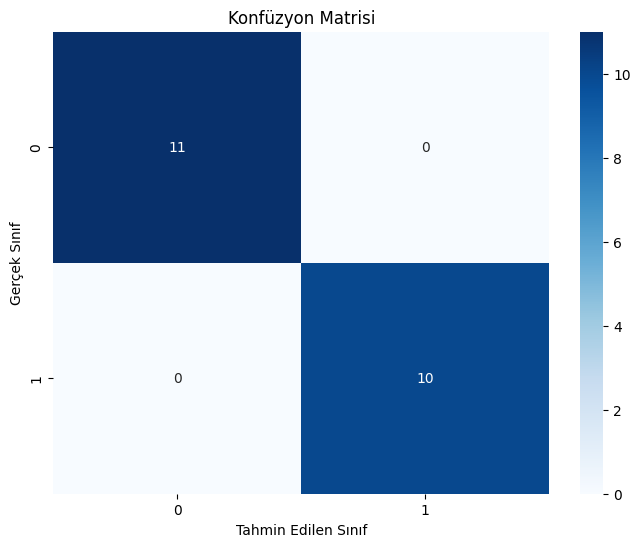

In [24]:
from sklearn.metrics import confusion_matrix

# Gerçek sınıflar ile tahmin edilen sınıflar arasındaki karşılaştırma
conf_matrix = confusion_matrix(Y_labels_test, predictions_classes)

print("Konfüzyon Matrisi:")
print(conf_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

# Konfüzyon matrisi görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Konfüzyon Matrisi')
plt.show()


In [23]:
print("Y_labels 5: ",Y_labels_test.shape)


Y_labels 5:  (21,)


# test 2

In [30]:

!git clone https://github.com/hmyrcmn/KUL.git

fatal: destination path 'KUL' already exists and is not an empty directory.


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

!git clone https://github.com/hmyrcmn/KUL.git

# Veri yükleme
true_folder ='/content/KUL/BigData/newData/test/tt'
X_data_test = []

Y_labels_test = []

for filename in os.listdir(true_folder):
    data = np.genfromtxt(os.path.join(true_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data_test.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels_test.append(1)

false_folder = '/content/KUL/BigData/newData/test/ff'
for filename in os.listdir(false_folder):
    data = np.genfromtxt(os.path.join(false_folder, filename), delimiter=',')
    # X_data.append(data)
    X_data_test.append(data[:, 1:])  # Sadece virgül sonrasındaki değerleri ekledim

    Y_labels_test.append(0)




X_data_test = np.array(X_data_test)
Y_labels_test = np.array(Y_labels_test)

# X_data ve Y_labels dizilerini karıştırın
X_data_test, Y_labels_test = shuffle(X_data_test, Y_labels_test)


print("x_data shape: ",X_data_test.shape)
# print("x_data 5: ",X_data_test[:1])
print("Y_labels 5: ",Y_labels_test.shape)


# yeni egitim

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Modeli oluştur
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(1000, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Modeli derle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğit
model.fit(X_train, y_train, epochs=10, batch_size=4)

# Modeli değerlendir
loss, accuracy = model.evaluate(X_train, y_train)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/10
800/800 [==============================] - 27s 30ms/step - loss: 1.1756 - accuracy: 0.4884
Epoch 2/10
800/800 [==============================] - 19s 24ms/step - loss: 0.6932 - accuracy: 0.4956
Epoch 3/10
800/800 [==============================] - 21s 26ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/10
800/800 [==============================] - 20s 25ms/step - loss: 0.6932 - accuracy: 0.5038
Epoch 5/10
800/800 [==============================] - 23s 29ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 6/10
800/800 [==============================] - 20s 26ms/step - loss: 0.6932 - accuracy: 0.5038
Epoch 7/10
800/800 [==============================] - 20s 26ms/step - loss: 0.6933 - accuracy: 0.5038
Epoch 8/10
800/800 [==============================] - 19s 24ms/step - loss: 0.6932 - accuracy: 0.5006
Epoch 9/10
800/800 [==============================] - 19s 24ms/step - loss: 0.6932 - accuracy: 0.5038
Epoch 10/10
100/100 [==============================] - 2s 19ms/step - loss: 0.6931

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import TensorBoard
import tensorflow as tf
import numpy as np
from datetime import datetime


# TensorBoard için bir log dizini oluşturun
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"TensorBoard Link: https://tensorboard.dev/experiment/{log_dir}")

# TensorBoard Callback'ini oluşturun
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Model oluşturma
model = Sequential()
model.add(Flatten(input_shape=(1000, 1)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))

# Model derleme
model.compile(optimizer='Nadam', loss='mean_squared_error', metrics=['mse','accuracy'])

# Model özetini yazdırma
model.summary()

# Modeli eğitme ve TensorBoard geri çağırımını kullanma
model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[tensorboard_callback])

# Diğer değerlendirmeleri yapma ve sonuçları yazdırma
test_loss, test_mse, test_acc = model.evaluate(X_test, y_test)
print(f'Test MSE: {test_mse}, Test Accuracy: {test_acc}')

# Model özetini yazdırma
model.summary()

# Test seti üzerinde tahminler yapma
y_pred_probabilities = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Tahmin edilen sınıfları ve olasılıkları yazdırma
for i in range(5):
    print(f"Actual Class: {y_test[i]}, Predicted Class: {y_pred_classes[i]}, Probabilities: {y_pred_probabilities[i]}")



log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(X_train, y_train, epochs=60, batch_size=128, validation_split=0.2, callbacks=[tensorboard_callback])
%load_ext tensorboard
%tensorboard --logdir logs/fit



In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Verileri yükle
data = []
for filename in os.listdir('trues'):
    if filename.endswith('.txt'):
        file_path = os.path.join('trues', filename)
        with open(file_path, 'r') as f:
            lines = f.readlines()
            data_point = []
            for line in lines:
                x, y = line.strip().split(',')
                data_point.append([float(x), float(y)])
            data.append(data_point)

# Verileri ön işleyin
data = np.array(data)
data = data.reshape(-1, 1000, 2)  # (num_files, num_timesteps, num_features)

# Verileri normalize edin
data = (data - data.mean()) / data.std()

# Verileri hazırlayın
X_train, X_val, X_test, y_train, y_val, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

# Model oluşturun
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1000, 2)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Derlemeyi yapın
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitin
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Modelin performansını değerlendirin
score = model.evaluate(X_test, y_test)
print('Test Kümesi Skoru:', score)
